In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [6]:
# data for problem instance
M = 20
N = 20
P = 20

X = np.array(
    [
        [
            3.5674,
            4.1253,
            2.8535,
            5.1892,
            4.3273,
            3.8133,
            3.4117,
            3.8636,
            5.0668,
            3.9044,
            4.2944,
            4.7143,
            3.3082,
            5.2540,
            2.5590,
            3.6001,
            4.8156,
            5.2902,
            5.1908,
            3.9802,
        ],
        [
            -2.9981,
            0.5178,
            2.1436,
            -0.0677,
            0.3144,
            1.3064,
            3.9297,
            0.2051,
            0.1067,
            -1.4982,
            -2.4051,
            2.9224,
            1.5444,
            -2.8687,
            1.0281,
            1.2420,
            1.2814,
            1.2035,
            -2.1644,
            -0.2821,
        ],
    ],
    dtype=float,
)

Y = np.array(
    [
        [
            -4.5665,
            -3.6904,
            -3.2881,
            -1.6491,
            -5.4731,
            -3.6170,
            -1.1876,
            -1.0539,
            -1.3915,
            -2.0312,
            -1.9999,
            -0.2480,
            -1.3149,
            -0.8305,
            -1.9355,
            -1.0898,
            -2.6040,
            -4.3602,
            -1.8105,
            0.3096,
        ],
        [
            2.4117,
            4.2642,
            2.8460,
            0.5250,
            1.9053,
            2.9831,
            4.7079,
            0.9702,
            0.3854,
            1.9228,
            1.4914,
            -0.9984,
            3.4330,
            2.9246,
            3.0833,
            1.5910,
            1.5266,
            1.6256,
            2.5037,
            1.4384,
        ],
    ],
    dtype=float,
)

Z = np.array(
    [
        [
            1.7451,
            2.6345,
            0.5937,
            -2.8217,
            3.0304,
            1.0917,
            -1.7793,
            1.2422,
            2.1873,
            -2.3008,
            -3.3258,
            2.7617,
            0.9166,
            0.0601,
            -2.6520,
            -3.3205,
            4.1229,
            -3.4085,
            -3.1594,
            -0.7311,
        ],
        [
            -3.2010,
            -4.9921,
            -3.7621,
            -4.7420,
            -4.1315,
            -3.9120,
            -4.5596,
            -4.9499,
            -3.4310,
            -4.2656,
            -6.2023,
            -4.5186,
            -3.7659,
            -5.0039,
            -4.3744,
            -5.0559,
            -3.9443,
            -4.0412,
            -5.3493,
            -3.0465,
        ],
    ],
    dtype=float,
)

In [14]:
a_1 = cp.Variable(2)
a_2 = cp.Variable(2)
a_3 = cp.Variable(2)
b_1 = cp.Variable()
b_2 = cp.Variable()
b_3 = cp.Variable()
u = cp.Variable(M)
v = cp.Variable(N)
w = cp.Variable(P)

constraints = [X.T @ (a_1 - a_2) + u - 1 >= b_1 - b_2]
constraints += [X.T @ (a_1 - a_3) + u - 1 >= b_1 - b_3]
constraints += [Y.T @ (a_2 - a_1) + v - 1 >= b_2 - b_1]
constraints += [Y.T @ (a_2 - a_3) + v - 1 >= b_2 - b_3]
constraints += [Z.T @ (a_3 - a_1) + w - 1 >= b_3 - b_1]
constraints += [Z.T @ (a_3 - a_2) + w - 1 >= b_3 - b_2]
constraints += [u >= 0, v >= 0, w >= 0]
constraints += [a_1 + a_2 + a_3 == 0, b_1 + b_2 + b_3 == 0]

objective = cp.Minimize(cp.sum(u) + cp.sum(v) + cp.sum(w))
problem = cp.Problem(objective, constraints)
problem.solve()
problem.status

'optimal'

In [16]:
a1 = a_1.value
a2 = a_2.value
a3 = a_3.value
b1 = b_1.value
b2 = b_2.value
b3 = b_3.value
a1, a2, a3, b1, b2, b3

(array([1.05505766, 1.03646411]),
 array([-0.60697246,  1.01760476]),
 array([-0.4480852 , -2.05406887]),
 array(-1.05648194),
 array(-2.83079127),
 array(3.8872732))

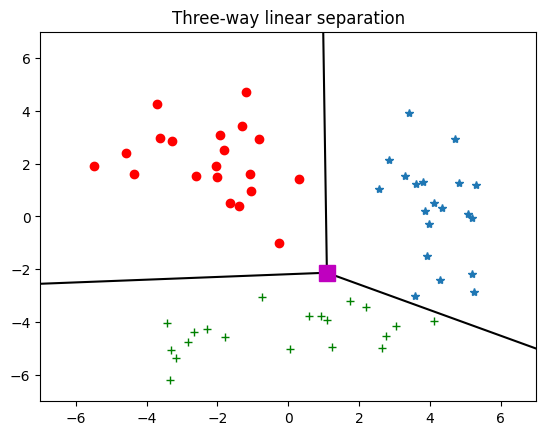

In [17]:
# now let's plot the three-way separation induced by a1,a2,a3,b1,b2,b3
# find maximally confusing point
A = np.vstack([(a1 - a2), (a1 - a3)])  # rows: (a1-a2)^T and (a1-a3)^T
rhs = np.array([b1 - b2, b1 - b3], dtype=float)
p = np.linalg.solve(A, rhs)  # shape (2,)

# plot
t = np.arange(-7.0, 7.0 + 1e-12, 0.01)

u1 = a1 - a2
u2 = a2 - a3
u3 = a3 - a1
v1 = b1 - b2
v2 = b2 - b3
v3 = b3 - b1

line1 = (-t * u1[0] + v1) / u1[1]
idx1 = np.where(u2[0] * t + u2[1] * line1 - v2 > 0)[0]

line2 = (-t * u2[0] + v2) / u2[1]
idx2 = np.where(u3[0] * t + u3[1] * line2 - v3 > 0)[0]

line3 = (-t * u3[0] + v3) / u3[1]
idx3 = np.where(u1[0] * t + u1[1] * line3 - v1 > 0)[0]

plt.figure()
plt.plot(X[0, :], X[1, :], "*", label="X")
plt.plot(Y[0, :], Y[1, :], "ro", label="Y")
plt.plot(Z[0, :], Z[1, :], "g+", label="Z")

plt.plot(t[idx1], line1[idx1], "k")
plt.plot(t[idx2], line2[idx2], "k")
plt.plot(t[idx3], line3[idx3], "k")
plt.plot(p[0], p[1], "ms", markersize=12, label="maximally confusing point")
# plt.legend()


plt.axis([-7, 7, -7, 7])
plt.title("Three-way linear separation")
plt.show()